# MP 2: Gradient Descent, Nesterov and Pseudo-Inverse

## Overall Task

In this MP, you will learn about gradient descent and one of its variants, nesterov. You goal is to reconstruct a medical image from its measurements. The objective function you will use is the mean squared error. You are expected to use the aforementioned methods to optimize over this loss. The problem formulation proposed is the classic least squares and thus it does have an analytical solution using the pseudo-inverse. Please use the analytical pseudo-inverse to confirm your numerical solutions using gradient descent and nesterov. Finally, you will be asked and encouraged to explore the parameters for both gradient descent and nesterov to see how they affect convergence and convergence rates. 

**Do Not Use Existing Packages for Gradient Descent, Nesterov and Pseudo-Inverse you are expected to implement all of these yourself.**

## Background

### Problem Formulation

In this MP we will be dealing with a very common type of problem called a linear inverse problem. In this problem formulation, our image $x$ has been transformed by a matrix $A$ with the addition of some additive noise $n$ to create some measurements $b$, which we have access to. We do not have access to $x$ and thus our goal will be to recover our original image to the best of our ability. Using a mean squared error loss we have the following optimization problem:

$$\hat{x} = \text{argmin}_x \|Ax - b\|^2$$

where $\hat{x}$ is the reconstruction of $x$ which yields the lowest mean squared error loss for the above least squared problem.

### Gradient Descent

In calculus you learned about derivative, a function which gives the slope of line tangent to the curve of interest. In multivariate calculus, this was called a gradient and instead of a value, it was a vector which pointed in the direction of greatest ascent on a multidimensional curve. In optimization, we usually want to find the minimum of some multidimensional loss function. Thus, we want the direction of greatest descent, which happens to be the opposite direction of greatest ascent. This leads us to a simple yet commonly used algorithm unsurprisingly called (steepest) gradient descent.

Consider a loss function $f(x)$ which we want to minimize and is differentiable with respect to $x$. This gives us the following problem formulation:

$$\hat{x} = \text{argmin}_x f(x)$$

Then, to find the minumum of $f$ (assuming $f$ is convex) we will first randomly initialize $x$ and then over $n$ steps we will update $x$ as follows:

$$x_{i+1} = x_i - \alpha \nabla f(x_i)$$

where $x_{i+1}$ is the next step $x$ value, $x_i$ is the current step $x$ value, $\alpha$ is a parameter that controls the rate of descent (step size) and allows for the algorithm to converge and $\nabla f(x_i)$ is the gradient of $f$ at location $x_i$.

### Nesterov

There are many variations of gradient descent and one such example is gradient descent with nesterov momentum. The algorithm is described below:

$$v_{i+1} = \mu v_i - \alpha \nabla f(x_i + v_i)$$
$$x_{i+1} = x_i + v_{i+1}$$

where $\mu$ is the momentum parameter and $v$ is an intermediary variable which is constantly updated along with $x$ in order to keep track of the changing momentum when descending on $f$.

### Pseudo-Inverse

As discussed above, this problem takes the form:

$$\hat{x} = \text{argmin}_x \|Ax - b\|^2$$

This is the classic least squares problem and has an analytical solution thanks to the pseudo-inverse of $A$ called $A^{+}$. Thus, the solution is $x = A^{+} b$. The pseudo-inverse can be calculated in the following ways:

* If $A$ is full column rank then

$$A^{+} = (A^* A)^{-1} A^*$$
 
* If $A$ is full row rank then

$$A^{+} = A^*(A A^*)^{-1}$$

* If $A$ is both full column rank and full row rank then

$$A^{+} = A^{-1}$$

Where $A^*$ is the conjugate transpose of $A$. Make sure that the matrix $A$ you will use has either full row rank or full column rank otherwise these equations do not hold. The pseudo-inverse has a variety of wonderful properties and you are encouraged to read more about them online.

## Loading Data

Let's load the packages that we will need as well as the image we will try to reconstruct. Note that we will vectorize the two dimensional image in order to use matrix multiplication. Please put the appropriate directory in np.load to get the image. Depending on where you put the image the current code may not work.

In [16]:
import pandas as pd

In [175]:
import seaborn as sns
import seaborn.objects as so
from seaborn import axes_style
theme_dict = {**axes_style("white"),"axes.spines.right": False, "axes.spines.top": False}

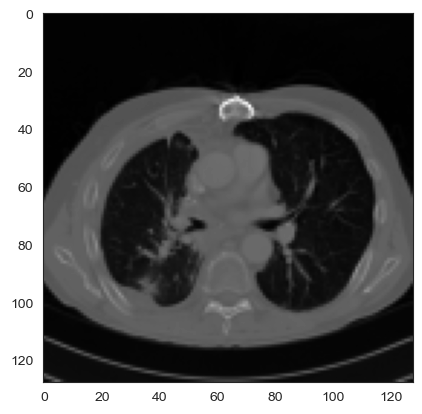

In [182]:
import numpy as np
import os
import matplotlib.pyplot as plt

img = np.load(os.getcwd()+'/ct_image.npy') # put appropriate directory here

plt.figure(1)
plt.imshow(img, cmap = 'gray')
plt.show()

img = img.flatten()
img = np.reshape(img, (img.shape[0],1))

## Creating the A Matrix

Now that we have our original image, we need to create our measurment matrix $A$ and our measurements $b$. Below you can find a a function which creates the $A$ matrix which is currently an identity matrix. This is a placeholder, feel free to change the arguments and internal workings of the function as you see fit to create your appropriate $A$ matrix.

In [87]:
####### PLEASE EDIT THIS #######

np.random.seed(27459161)
def create_A(dimension):
    #np.identity(dimension) # placeholder for now
    
    return np.random.normal(loc=0.0, scale = 1.0, size = (dimension,dimension))
# make sure A is either full row rank or full column rank

################################

A = create_A(np.shape(img)[0])
b = np.matmul(A,img) + np.random.normal(loc=0.0, scale = 1.0, size = (np.shape(A)[0],np.shape(img)[1]))

#print matrix shapes as a sanity check
print(np.shape(A), np.shape(b), img.shape)

(16384, 16384) (16384, 1) (16384, 1)


## Implementing Gradient Descent, Nesterov and the Pseudo-Inverse
Implement all the functions below. The main ones are gradient descent, nesterov and pseudo-inverse. Grad and mse are helper functions. Grad returns the gradient for the loss function with respect to the reconstructed image $x$ while mse returns the mean squared error between two matrices. Also note that the three main functions will be timed and compared. It is expected that nesterov and gradient descent are the quickest while the pseudo-inverse should take more time to complete. Also please make sure to keep track of the loss over the iterations in training.

**DO NOT USE EXISTING PACKAGES FOR THESE FUNCTIONS.**

loss function $f(x) = \text{argmin}_x \| Ax - b\|^2$

In [171]:
#Solve LS using GD, Nesterov and the pseudo-inverse
#compare results and times
import time
from timeit import Timer
import functools
################################
 
def timer(func): 
    # timer wrapper around a function
    # prints the time taken to run the function one time to the console
    @functools.wraps(func)
    def wrapper_timer(*args):
        t1 = time.time()
        out, loss = func(*args)
        t2 = time.time()
        print(
              f'\tIterations: \t{len(loss)}  \n'
              f'\tTime: \t\t{round(t2-t1, 2)} \n'
              f'\tFinal loss: \t{round(loss[-1], 2)} \n'
              f'\t{round((loss[-1]/loss[0])*100, 5)} percent of x_0 loss.')
        return out, loss
    return wrapper_timer   

def timer2(func): 
    # timer wrapper around a function
    # prints the time taken to run the function one time to the console
    @functools.wraps(func)
    def wrapper_timer(*args):
        t1 = time.time()
        out = func(*args)
        t2 = time.time()
        print(
              f'\tTime: \t\t{round(t2-t1, 2)} \n')
        return out
    return wrapper_timer    
        

In [172]:
@timer2
def pseudo_inverse(A, b):
    
    if (A.shape[0] == A.shape[1]):
        Aplus = np.linalg.inv(A)
    elif (A.shape[0] > A.shape[1]):
        # wide matrix
        Aplus = np.transpose(A) @ np.linalg.inv(A @ np.transpose(A))
    else:
        # tall matrix
        Aplus = np.linalg.inv(np.transpose(A) @ A) @ A

    return Aplus@b

In [4]:
def mse(a, b):
    # find the mean squared error between two matrices
    return (np.square(np.subtract(a,b))).mean()

In [146]:
def loss(A,b,x):
    # calculate loss according to loss function
    # which is the L2 norm squared
    return np.square(np.linalg.norm(A@x - b))

In [6]:
def grad(A, b, x):
    # return the gradient of the loss function with respect to the reconstructed image x 
    # gradient of f(x) = 2[(Ax - b)^T A]   
    return 2 * np.transpose(A @ x - b) @ A

In [10]:
def calculate_step(A,b,x,lr):
    return np.multiply(-lr, np.transpose(grad(A,b,x)))

In [141]:
def nesterov_step(A,b,x,lr,m,v):
    p1 = np.multiply(m,v)
    gradient = np.transpose(grad(A,b, (x+v)))
    p2 = np.multiply(lr, gradient)

    return  np.subtract(p1,p2)

In [148]:
@timer
def GD(A, b, iters, lr):
    '''
    A: a full row rank or full column rank measurement matrix
    b: the measured data
    lr: the learning rate or covergence rate to use
    iters: the number of iterations to do
    
    returns: 
    x the reconstructed image data 
    loss from each iteration with respect to the reconstructed image x
    
    f(x) is assumed to be a smooth, strongly convex function.
    '''
    # initialize x 
    x = np.zeros((A.shape[1],b.shape[1]))
    # keep track of loss over iterations
    losses = []
    # calculate current loss
    current_loss = loss(A,b,x)
    
    while len(losses) < iters:
        next_x = x + calculate_step(A,b,x,lr)
        next_loss = loss(A,b,next_x)
        # if the function increases, the step was too large
        # halve the step size and try again
        if next_loss > current_loss:
            lr = lr/2
            continue
        
        # update x and current_loss 
        x = next_x
        current_loss = next_loss
        # add current_loss to list
        losses.append(current_loss)
        
    print(
         f'\tFinal lr: \t {lr}.')
    
    return x, losses


In [153]:
@timer
def Nesterov(A, b, lr, m, iters):
    '''
    A: a full row rank or full column rank measurement matrix
    b: the measured data
    lr: the learning rate or covergence rate to use
    m: momentum parameter
    iters: the number of iterations to do
    
    returns: x the reconstructed image data and loss the loss from each iteration with respect to the reconstructed image x
    
    f(x) is assumed to be a smooth, strongly convex function.
    '''

    #initialize x, v
    x = np.zeros((A.shape[1],b.shape[1]))
    v = np.zeros((A.shape[1],b.shape[1]))
    
    #keep track of loss
    losses= []
    
    current_loss = loss(A,b,x)
    
    while len(losses) < iters:
        next_v = nesterov_step(A,b,x,lr,m,v)
        next_x = x + next_v
        next_loss = loss(A,b,next_x)
        if next_loss > current_loss:
            lr = lr/2
        #print('Not converging. Adjusting step size.')
            continue
        
        x = next_x
        v = next_v
        current_loss = next_loss
        losses.append(current_loss)


    return x, losses

Now that you have implemented the functions above, play around with the parameters for gradient descent and nesterov in order to: 1) find which parameters lead to a converging result, and 2) find parameters which lead to a solution with a low MSE in less time than the pseudo-inverse. Also modify the parameters (especially the momentum parameter for nesterov) to see how quickly you can get the two algorithms to converge to low MSE results. Show your resulting solutions.

## Plotting the Loss Curves

Plot the resulting loss curves for nesterov and gradient descent. Try several different parameter combinations and plot those too.

In [14]:
alpha = [5000, 1000, 500, 10,1]
iterations = [10, 100, 200, 500]

final_loss = []
alphas = []
num_iter = []

for a in alpha:
    print(f'Starting lr: {a}')
    gd_out, gd_loss = GD(A,b,500, a)
    for i in iterations:
        final_loss.append(gd_loss[(i-1)])
        alphas.append(a)
        num_iter.append(i)

Starting lr: 5000
	Final lr: 	 9.313225746154785e-06.
	Iterations: 	500  
	Time: 		109.68 
	Final loss: 	7073819844.38 
	0.01218 percent of x_0 loss.
Starting lr: 1000
	Final lr: 	 1.4901161193847656e-05.
	Iterations: 	500  
	Time: 		108.85 
	Final loss: 	3532957371.83 
	0.01073 percent of x_0 loss.
Starting lr: 500
	Final lr: 	 1.4901161193847656e-05.
	Iterations: 	500  
	Time: 		108.45 
	Final loss: 	3532957371.83 
	0.01073 percent of x_0 loss.
Starting lr: 10
	Final lr: 	 9.5367431640625e-06.
	Iterations: 	500  
	Time: 		107.61 
	Final loss: 	6845509179.79 
	0.01096 percent of x_0 loss.
Starting lr: 1
	Final lr: 	 1.52587890625e-05.
	Iterations: 	500  
	Time: 		106.88 
	Final loss: 	26633789653.79 
	0.07732 percent of x_0 loss.


In [46]:
d = {'lr' : alphas,
       'iter' : map(str, num_iter),
       'loss' : final_loss,
    'log_loss': np.log(final_loss),
    'log_lr' : np.log(alphas)}
out = pd.DataFrame(d)

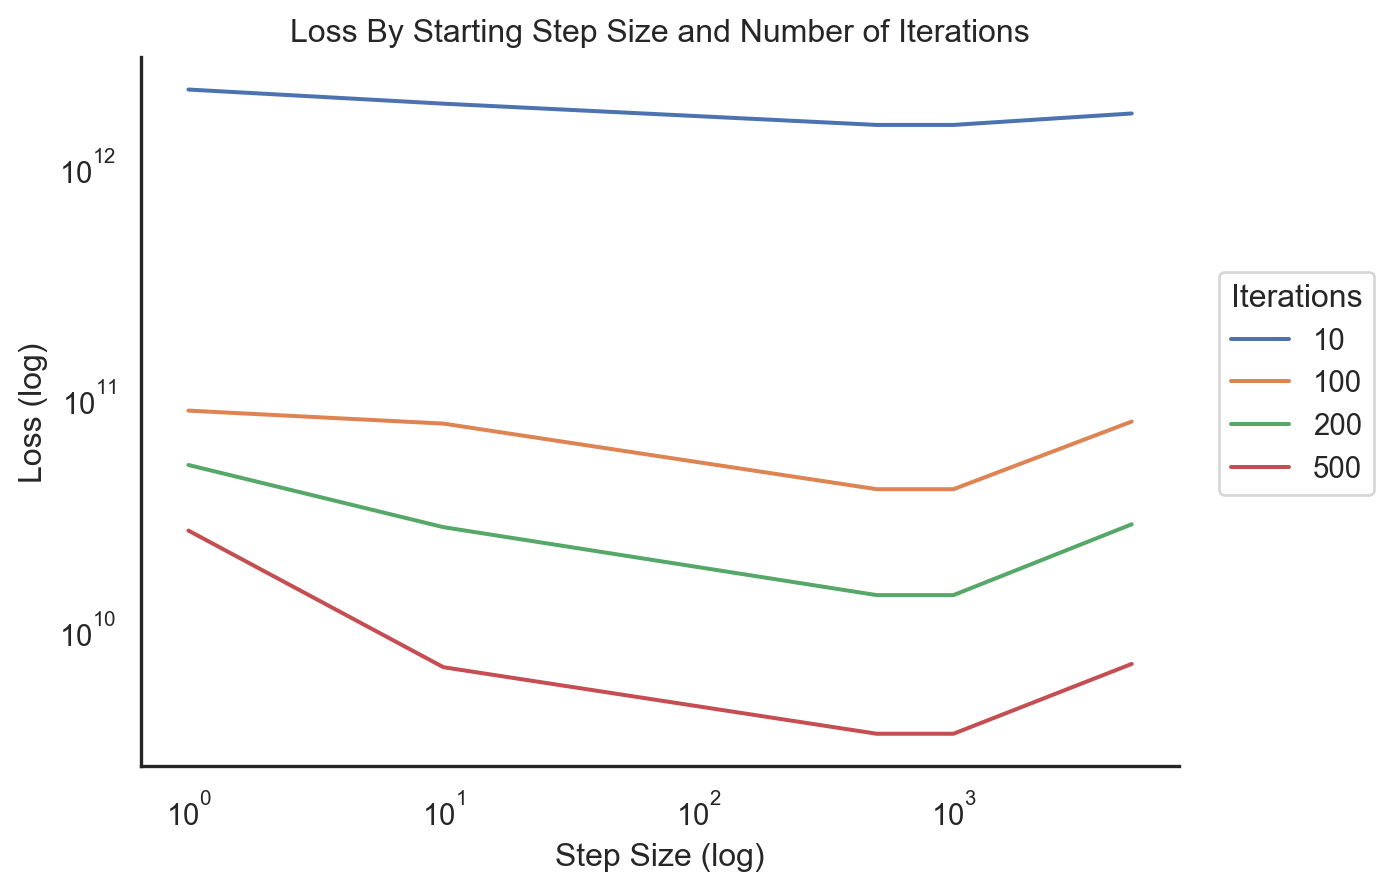

In [48]:
(
    so.Plot(out, x = 'lr', y = 'loss')
    .add(so.Line(),  color = 'iter')
    .scale(y = 'log', 
          x = 'log')
    .label(
        x = 'Step Size (log)',
        y = 'Loss (log)',
        color = 'Iterations',
        title = 'Loss By Starting Step Size and Number of Iterations'
    )
    .theme(theme_dict)
)

In [159]:
alpha = 1
iterations = [10, 100, 200]
m = [0.05, 0.5, 0.95]

final_loss = []
ms = []
num_iter = []

for M in m:
    print(f'Starting lr: {M}')
    nest_out, nest_loss = Nesterov(A,b,alpha,M, 200)
    for i in iterations:
        final_loss.append(nest_loss[(i-1)])
        ms.append(M)
        num_iter.append(i)

Starting lr: 0.05
	Iterations: 	200  
	Time: 		46.13 
	Final loss: 	100044637691.8 
	0.29046 percent of x_0 loss.
Starting lr: 0.5
	Iterations: 	200  
	Time: 		45.57 
	Final loss: 	51128354596.78 
	0.14844 percent of x_0 loss.
Starting lr: 0.95
	Iterations: 	200  
	Time: 		45.67 
	Final loss: 	420553185.71 
	0.00122 percent of x_0 loss.


In [161]:
nestdict = {'momentum' : ms,
       'iter' : map(str, num_iter),
       'loss' : final_loss}
nestpd = pd.DataFrame(nestdict)

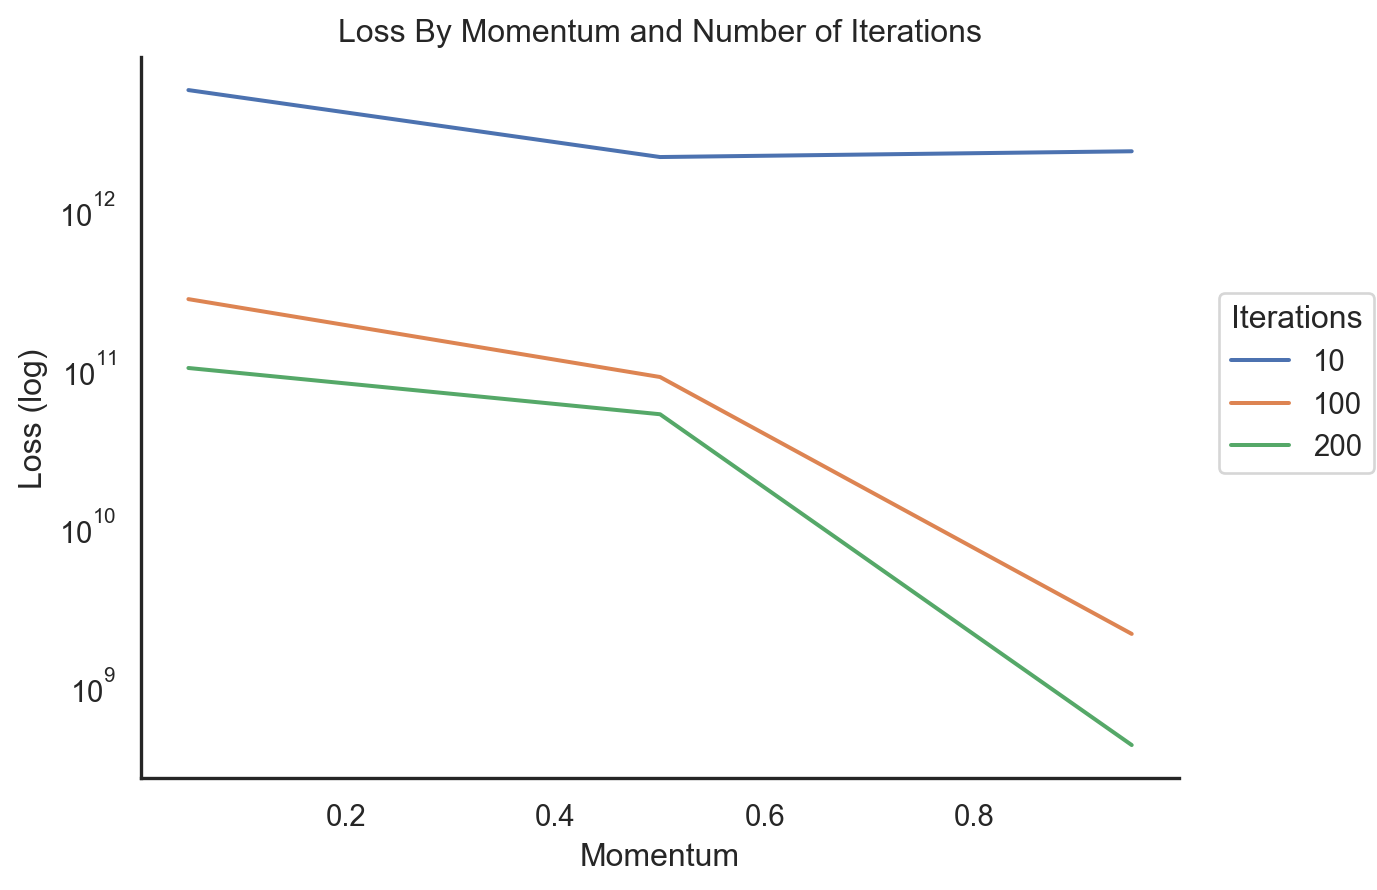

In [163]:
(
    so.Plot(nestpd, x = 'momentum', y = 'loss')
    .add(so.Line(),  color = 'iter')
    .scale(y = 'log')
    .label(
        x = 'Momentum',
        y = 'Loss (log)',
        color = 'Iterations',
        title = 'Loss By Momentum and Number of Iterations'
    )
    .theme(theme_dict)
)

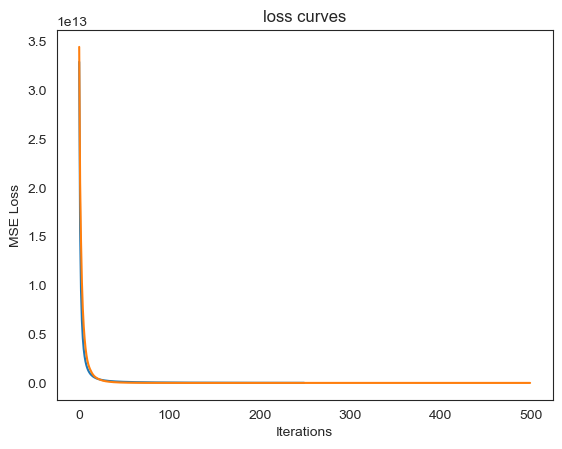

In [190]:
plt.figure(1)
plt.title('loss curves')
plt.plot(gd_loss, label='GD Loss')
plt.plot(nest_loss, label='Nesterov Loss')
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.show()

## Final Solutions

In [20]:
gd_out, gd_loss = GD(A, b, 250, 500)

	Final lr: 	 1.4901161193847656e-05.
	Iterations: 	250  
	Time: 		57.72 
	Final loss: 	9971508521.15 
	0.0303 percent of x_0 loss.


In [ ]:
nest_out, nest_loss = Nesterov(A,b, 1, 0.95, 300)

In [173]:
pseudo_sol = pseudo_inverse(A,b)
print("Pseudo Inverse Done")
print(f'MSE from Pseudoinverse: {mse(pseudo_sol, img)}')

	Time: 		89.49 

Pseudo Inverse Done
MSE from Pseudoinverse: 54.43086319298106


Text(0.5, 1.0, 'Original Image')

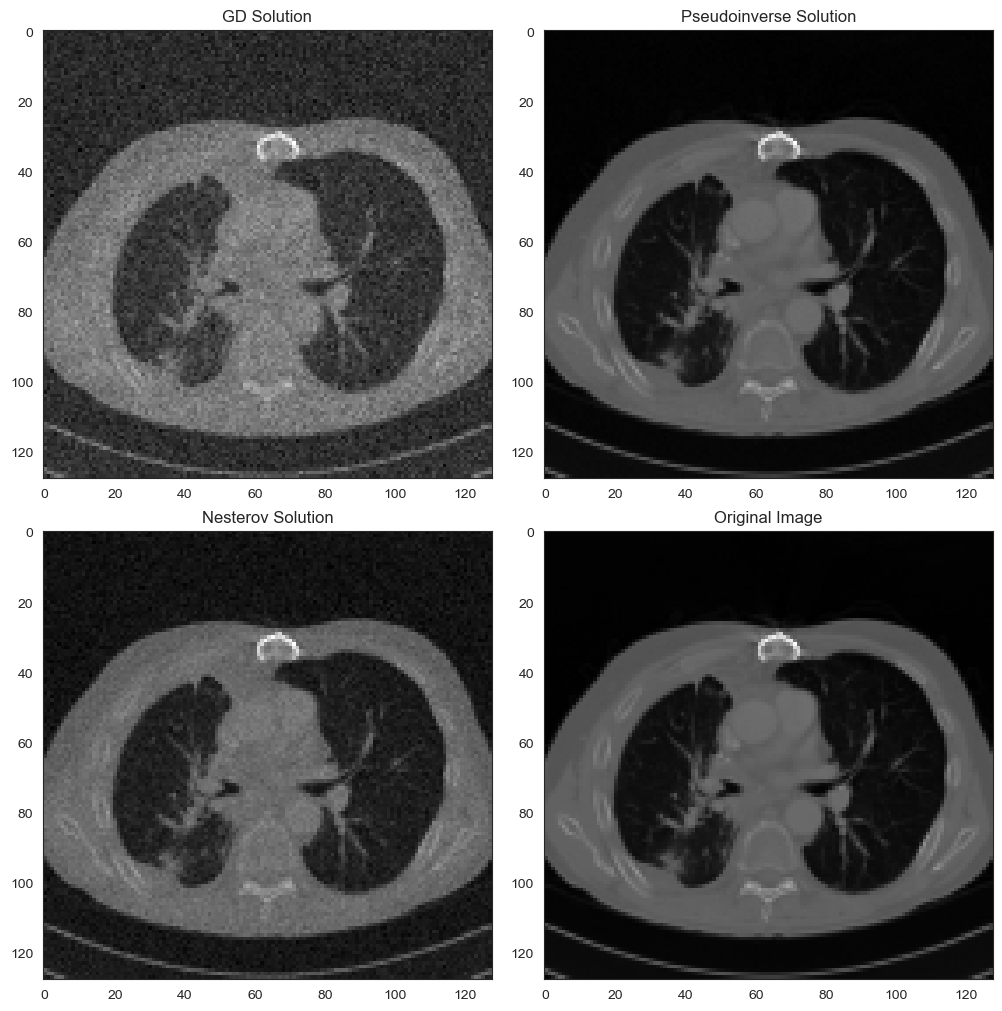

In [189]:
fig, axes = plt.subplots(2,2, figsize = (10,10), layout = 'constrained')
axes[0,0].imshow(np.reshape(gd_out,(128,128)), cmap = 'gray')
axes[0,0].set_title('GD Solution')
axes[1,0].imshow(np.reshape(nest_out, (128,128)), cmap = 'gray')
axes[1,0].set_title('Nesterov Solution')
axes[0,1].imshow(np.reshape(pseudo_sol, (128,128)), cmap = 'gray')
axes[0,1].set_title('Pseudoinverse Solution')
axes[1,1].imshow(np.reshape(img, (128,128)), cmap ='gray' )
axes[1,1].set_title("Original Image")

## Question Time

Finally, write a few sentences discussing how the learning rate and momentum affect the convergence rate: 1) Do the algorithms always converge to a good solution? 2) In practice, when would we want to use the pseudo-inverse over gradient descent and nesterov? 3) When would we want to use gradient descent and nesterov over the pseudo-inverse? 

Please put your answers in the markdown cell below.

**Answers:** 